In [74]:
import networkx as nx
import random
import matplotlib.pyplot as plt
from cynetdiff.utils import networkx_to_ic_model
import numpy as np

In [75]:
def create_plot_for_nodes_infected_perc(graph: nx.Graph, seeds):
    """
    Create a plot of the percentage of nodes infected for a CyNetDiff model.
    """
    model = networkx_to_ic_model(graph)
    model.set_seeds(seeds)
    num_trials = 100

    # List to hold results from all trials
    all_trials_infected_nodes = []
    max_length=0
    
    for _ in range(num_trials):
        model.reset_model()
    
        infected_nodes_over_time = []
        previous_activated = -1
        current_activated = 0
    
        while previous_activated != current_activated:
            previous_activated = current_activated
            model.advance_model()
            current_activated = model.get_num_activated_nodes()
            infected_nodes_over_time.append(current_activated)
            
        max_length = max(max_length, len(infected_nodes_over_time))
        all_trials_infected_nodes.append(infected_nodes_over_time)
        
    padded_trials = [trial + [trial[-1]] * (max_length - len(trial)) for trial in all_trials_infected_nodes]

    median_infected = np.median(padded_trials, axis=0)

    # Calculate the IQR for each iteration
    iqr_values = []
    for i in range(max(map(len, padded_trials))):
        iteration_data = [trial[i] if i < len(trial) else trial[-1] for trial in padded_trials]
        iqr_values.append(np.percentile(iteration_data, [25, 75]))
    lower_quartile, upper_quartile = zip(*iqr_values)
    
    # Plotting
    plt.fill_between(range(len(lower_quartile)), lower_quartile, upper_quartile, color='#7daec7', alpha=0.3)
    
    for y in median_infected:
        plt.axhline(y=y, color='gray', linestyle='--', alpha=0.2)
    
    # Plotting the median infected line
    plt.plot(median_infected, label='Median Infected', color='#3f83a6')
    
    plt.xlabel('Iteration')
    plt.ylabel('Number of Infected Nodes')
    plt.title('Diffusion Process Over Time')
    plt.legend()
    plt.show()

In [76]:
def create_plot_for_delta_nodes_infected(graph: nx.Graph, seeds):
    """
    Create a plot of the delta of nodes infected for a CyNetDiff model across multiple trials.
    """
    model = networkx_to_ic_model(graph)
    model.set_seeds(seeds)
    num_trials = 100

    all_trials_delta_nodes = []
    max_length = 0

    for _ in range(num_trials):
        model.reset_model()

        delta_nodes_over_time = []
        previous_activated = -1
        current_activated = 0

        while previous_activated != current_activated:
            previous_activated = current_activated
            model.advance_model()
            current_activated = model.get_num_activated_nodes()
            delta_nodes_over_time.append(current_activated - previous_activated)

        max_length = max(max_length, len(delta_nodes_over_time))
        all_trials_delta_nodes.append(delta_nodes_over_time)

    padded_trials = [trial + [0] * (max_length - len(trial)) for trial in all_trials_delta_nodes]

    median_delta = np.median(padded_trials, axis=0)
    
    # Calculate the IQR for each iteration
    iqr_values = []
    for i in range(max(map(len, padded_trials))):
        iteration_data = [trial[i] if i < len(trial) else 0 for trial in padded_trials]
        iqr_values.append(np.percentile(iteration_data, [25, 75]))

    lower_quartile, upper_quartile = zip(*iqr_values)

    for y in median_delta:
        plt.axhline(y=y, color='gray', linestyle='--', alpha=0.2)

    # Plotting
    plt.fill_between(range(len(lower_quartile)), lower_quartile, upper_quartile, color='#7daec7', alpha=0.3)
    plt.plot(median_delta, label='Median Delta Nodes', color='#3f83a6' )

    plt.xlabel('Iteration')
    plt.ylabel('Delta Nodes Infected')
    plt.title('Diffusion Process Over Time')
    plt.legend()
    plt.show()

In [77]:
#G = nx.fast_gnp_random_graph(15000, 2)
G = nx.watts_strogatz_graph(15000, 100,.01)
#G = nx.erdos_renyi_graph(100, 0.1)
nx.set_edge_attributes(G, .01, "activation_prob")
num_seeds = 100
seeds = set(random.sample(list(G.nodes()), num_seeds))

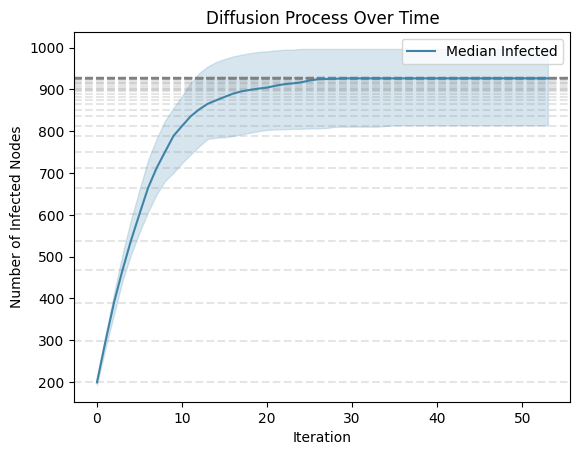

In [78]:
create_plot_for_nodes_infected_perc(G,seeds)

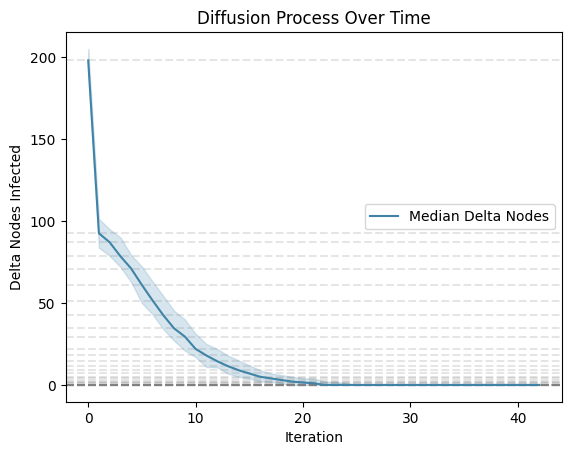

In [79]:
create_plot_for_delta_nodes_infected(G,seeds)